In [93]:
from __future__ import print_function
import pandas as pd
import numpy as np
import sys
import os
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print('GPU device not found')
else:
    print("GPU device-name is:", device_name)
print('Found GPU at: {}'.format(device_name))
#from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split

from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
import math 
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Input
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten, AveragePooling2D, GlobalAveragePooling2D
from tensorflow.keras import layers as L
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Data Visualizations
import seaborn as sns
from tensorflow.keras.preprocessing.image import load_img, img_to_array, array_to_img
from tensorflow.keras.applications.vgg16 import preprocess_input
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

GPU device-name is: /device:GPU:0
Found GPU at: /device:GPU:0


In [94]:
 print(tf.__version__)

2.4.0


# Accessing the dataset using np.load

In [95]:
baseball=np.load("full_numpy_bitmap_baseball bat.npy")
dog=np.load("full_numpy_bitmap_dog.npy")
dolphin=np.load("full_numpy_bitmap_dolphin.npy")
golf_club=np.load("full_numpy_bitmap_golf club.npy")
eiffel_tower = np.load("full_numpy_bitmap_The Eiffel Tower.npy")
bowtie= np.load("full_numpy_bitmap_bowtie.npy")

In [96]:
baseball.shape

(123809, 784)

In [97]:
baseball_train=baseball[:4600]
dog_train=dog[:4600]
dolphin_train = dolphin[:4600]
golf_club_train=golf_club[:4600]
bowtie_train= bowtie[:4600]
eiffel_tower_train= eiffel_tower[:4600]


In [98]:
baseball_y=np.zeros((4600))

In [99]:
dog.shape

(152159, 784)

In [100]:
dog_y=np.ones((4600))*1

In [101]:
dolphin.shape

(121613, 784)

In [102]:
dolphin_y=np.ones((4600))*2

In [103]:
golf_club.shape

(194843, 784)

In [104]:
golf_club_y=np.ones((4600))*3

In [105]:
bowtie.shape

(130283, 784)

In [106]:
bowtie_y=np.ones((4600))*4

In [107]:
eiffel_tower.shape

(134801, 784)

In [108]:
eiffel_tower_y=np.ones((4600))*5

In [109]:
baseball_y.shape

(4600,)

### Concatinating to create the train and the test set

In [110]:
train_x=np.concatenate([baseball_train,dog_train,dolphin_train,golf_club_train,bowtie_train,eiffel_tower_train])

In [111]:
train_y=np.concatenate([baseball_y,dog_y,dolphin_y,golf_club_y,bowtie_y,eiffel_tower_y])

In [112]:
train_y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [113]:
train_y.shape

(27600,)

In [114]:
train_x.shape

(27600, 784)

In [115]:
np.set_printoptions(threshold=sys.maxsize)


In [116]:
#reshaping the dataset 
x = train_x.reshape(27600,28,28,1)
y= train_y
print(x.shape)

(27600, 28, 28, 1)


In [117]:
y.shape

(27600,)

In [118]:
train_images, test_images, train_labels, test_labels = train_test_split(x,y,test_size=0.2,random_state=100, stratify=y)

In [119]:
#printing the shape
print("Training test datashape : ",train_images.shape,train_labels.shape)
print("Test test datashape : ",test_images.shape,test_labels.shape)

Training test datashape :  (22080, 28, 28, 1) (22080,)
Test test datashape :  (5520, 28, 28, 1) (5520,)


In [120]:
classes = np.unique(train_y)
print("The different classes : ", classes)
nclass= len(classes)
print("The total number of classes : ", nclass)

The different classes :  [0. 1. 2. 3. 4. 5.]
The total number of classes :  6


Text(0.5, 1.0, 'Ground Truth : 3.0')

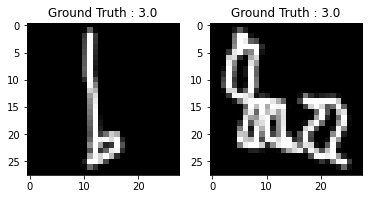

In [121]:
# Display the first image in training data
plt.subplot(121)
plt.imshow(train_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_labels[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_labels[0]))

In [122]:
# Find the shape of input images and create the variable input_shape
rows,cols,dims = train_images.shape[1:]
train_data = train_images.reshape(train_images.shape[0], rows, cols, dims)
test_data = test_images.reshape(test_images.shape[0], rows, cols, dims)
input_shape = (rows, cols, dims)

# Change to float datatype
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')

# Scale the data to lie between 0 to 1
train_data /= 255
test_data /= 255

# Change the labels from integer to categorical data
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)
test_labels_one_hot.shape

(5520, 6)

In [123]:
# Display the change for category label using one-hot encoding
print('Original label 0 : ', train_labels[0])
print('After conversion to categorical ( one-hot ) : ', train_labels_one_hot[0])
print(input_shape)

Original label 0 :  3.0
After conversion to categorical ( one-hot ) :  [0. 0. 0. 1. 0. 0.]
(28, 28, 1)


### Creating a CNN model and testing it's performance

In [124]:
from tensorflow.keras.callbacks import EarlyStopping

In [140]:
cnnmodel = Sequential()
cnnmodel.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape= (28,28,1) ))
cnnmodel.add(Conv2D(32, (3, 3), activation='relu'))
cnnmodel.add(MaxPooling2D(pool_size=(2, 2)))

cnnmodel.add(Dropout(0.2))
cnnmodel.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
#model.add(Conv2D(64, (3, 3), activation='relu'))


cnnmodel.add(MaxPooling2D(pool_size=(2, 2)))
cnnmodel.add(Dropout(0.3))
cnnmodel.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
#model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
cnnmodel.add(MaxPooling2D(pool_size=(2, 2)))

cnnmodel.add(Dropout(0.3))
cnnmodel.add(Flatten())    
cnnmodel.add(Dense(256, activation='relu'))
#The first two layers with 32 filters of window size 3x3
cnnmodel.add(Dense(6, activation='softmax'))



In [141]:
opt = keras.optimizers.Adam(learning_rate=0.001, amsgrad = True)
cnnmodel.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])


In [142]:
early = EarlyStopping(monitor='val_loss', patience = 10, min_delta=0, verbose=0)

In [143]:
hist = cnnmodel.fit(train_data,train_labels_one_hot, batch_size=64, epochs=20, verbose=2,validation_data=(test_data, test_labels_one_hot))

Epoch 1/20
345/345 - 2s - loss: 0.5584 - accuracy: 0.8177 - val_loss: 0.3490 - val_accuracy: 0.8830
Epoch 2/20
345/345 - 2s - loss: 0.3413 - accuracy: 0.8918 - val_loss: 0.2897 - val_accuracy: 0.9054
Epoch 3/20
345/345 - 2s - loss: 0.2897 - accuracy: 0.9057 - val_loss: 0.2587 - val_accuracy: 0.9174
Epoch 4/20
345/345 - 2s - loss: 0.2565 - accuracy: 0.9168 - val_loss: 0.2353 - val_accuracy: 0.9221
Epoch 5/20
345/345 - 2s - loss: 0.2334 - accuracy: 0.9217 - val_loss: 0.2347 - val_accuracy: 0.9212
Epoch 6/20
345/345 - 2s - loss: 0.2132 - accuracy: 0.9304 - val_loss: 0.2458 - val_accuracy: 0.9207
Epoch 7/20
345/345 - 2s - loss: 0.2017 - accuracy: 0.9329 - val_loss: 0.2098 - val_accuracy: 0.9339
Epoch 8/20
345/345 - 2s - loss: 0.1789 - accuracy: 0.9387 - val_loss: 0.2073 - val_accuracy: 0.9344
Epoch 9/20
345/345 - 2s - loss: 0.1719 - accuracy: 0.9396 - val_loss: 0.2000 - val_accuracy: 0.9357
Epoch 10/20
345/345 - 2s - loss: 0.1572 - accuracy: 0.9452 - val_loss: 0.2031 - val_accuracy: 0.9335

In [135]:
print(hist.history)


{'loss': [0.5590322017669678, 0.34159502387046814, 0.2929146885871887, 0.26267656683921814, 0.23526209592819214, 0.21542765200138092, 0.20129668712615967, 0.18974542617797852, 0.17062170803546906, 0.16048282384872437, 0.15334397554397583, 0.14463886618614197, 0.12998773157596588, 0.12627370655536652, 0.11710555851459503, 0.11558980494737625, 0.10031383484601974, 0.09615129977464676, 0.0916735902428627, 0.0892966091632843], 'accuracy': [0.8111866116523743, 0.8916666507720947, 0.905434787273407, 0.9119112491607666, 0.9216485619544983, 0.9269927740097046, 0.9331974387168884, 0.9348731637001038, 0.9413949251174927, 0.944972813129425, 0.9467844367027283, 0.9492753744125366, 0.9543025493621826, 0.9551630616188049, 0.9587862491607666, 0.9591485261917114, 0.9636322259902954, 0.9649909138679504, 0.9678441882133484, 0.9685688614845276], 'val_loss': [0.3470216691493988, 0.29534417390823364, 0.28026437759399414, 0.23969857394695282, 0.22310268878936768, 0.21999016404151917, 0.22966191172599792, 0.

#### Loss Curve

Text(0.5, 1.0, 'Loss Curves')

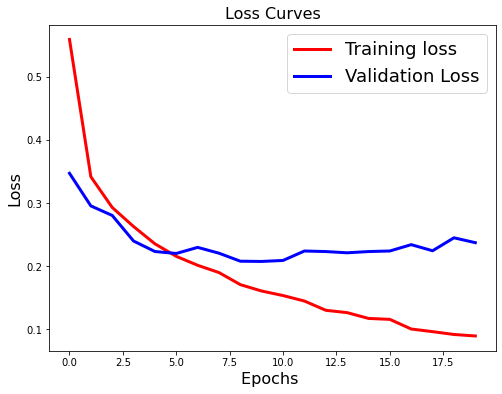

In [136]:
plt.figure(figsize=[8,6])
plt.plot(hist.history['loss'],'r',linewidth=3.0)
plt.plot(hist.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

#### Accuracy Curve

Text(0.5, 1.0, 'Accuracy Curves')

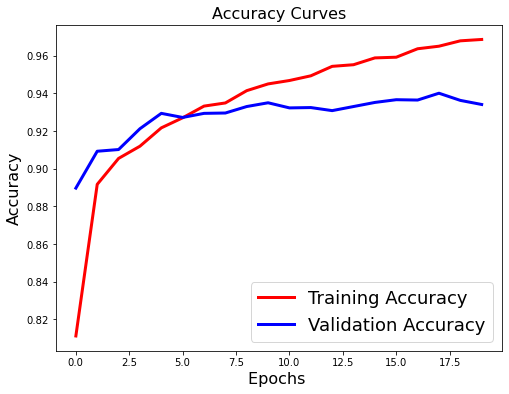

In [137]:
plt.figure(figsize=[8,6])
plt.plot(hist.history['accuracy'],'r',linewidth=3.0)
plt.plot(hist.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

#### Confusion Matrix

array([[854,  17,  12,  18,  15,   4],
       [  7, 847,  25,  14,  21,   6],
       [ 18,  38, 846,   2,  11,   5],
       [ 28,  23,  12, 846,   6,   5],
       [  9,  22,  14,  10, 864,   1],
       [  3,   8,   1,   7,   2, 899]], dtype=int64)

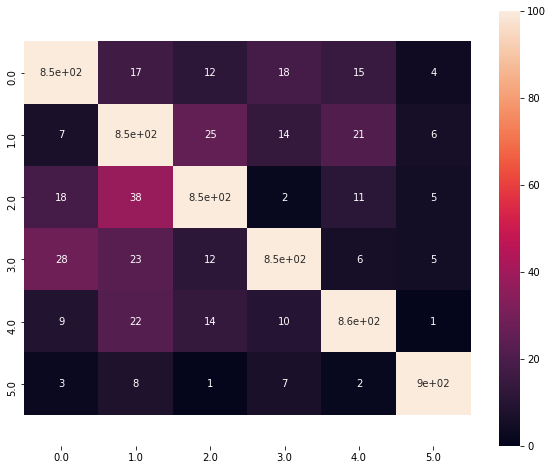

In [138]:
import pandas as pd
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
Y_val_pred = model.predict(test_data)#, num_of_test_samples // batch_size+1
Y_val_pred = np.argmax(Y_val_pred, axis=1)
cf_matrix = confusion_matrix(test_labels, Y_val_pred)
categories = list(np.unique(test_labels))
df_cm = pd.DataFrame(cf_matrix,index = categories,
  columns = categories)
plt.figure(figsize=(10,8))
res = sns.heatmap(df_cm, annot=True, vmin=0.0, vmax=100.0)
bottom, top = res.get_ylim()
res.set_ylim(bottom + 0.5, top - 0.5)
cf_matrix

In [133]:
#----------------------------------------------------------------

In [134]:
#The code below resizes the image to 80 x 80 for our VGG 16
#The default size of (28, 28, 1) does not work for a VGG-16 input, as it is trained for higher dimensional data. 
#Hence, we need the code below. Let us preprocess the image and add 3 channels 
#(since the transfer learning model we use, VGG-16, requires 3 channels to be present.

In [35]:
import sys
from PIL import Image
sys.modules['Image'] = Image 
from tensorflow.keras.preprocessing.image import load_img, img_to_array, array_to_img

def format_shift(image):
    i = array_to_img(image, scale=False) #returns Python Image Libraby Image
    i = i.resize((80, 80)) #resizes the image to 80x80 from 28 x 28
    i = i.convert(mode='RGB') #makes 3 channels in our image
    a = img_to_array(i) #converts it back to an array
    return a.astype(np.float64)

In [36]:
train_vgg_x= [format_shift(img) for img in x]
train_vgg_x=np.array(train_vgg_x)


In [37]:
train_vgg_x.shape

(27600, 80, 80, 3)

In [38]:
print(y.shape)

(27600,)


In [39]:
y = to_categorical(y)

In [40]:
train_vgg_x = preprocess_input(train_vgg_x)
train_vgg_x = np.array(train_vgg_x)
train_vgg_x = train_vgg_x.astype('float32')
train_vgg_x /= 255

train_images1, test_images1, train_labels1, test_labels1 = train_test_split(train_vgg_x,y, test_size=0.2, random_state=1, stratify=y)

# We are using ImageDataGenerator to increase the size of our dataset so that the machine learning algorithm has more data
# to train with.
image_generator1 = ImageDataGenerator(
    #samplewise_center=True, don't
    #featurewise_center=True, don't
    #featurewise_std_normalization=True, don't
    samplewise_std_normalization = True,
    #zca_whitening = True,
        zoom_range=0.1, # randomly zoom into images
        rotation_range=20,  # randomly rotate images in the range (degrees, 0 to 180)
        
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

train_generator = image_generator1.flow(train_images1, 
                                 train_labels1,
                                batch_size=32,
                                shuffle=True,
                                seed=23)
valid_generator = image_generator1.flow(test_images1,
                                 test_labels1,
                                batch_size=16,
                                shuffle=True)

C:\Users\shank\anaconda3\envs\myenv\lib\site-packages\keras_preprocessing\image\image_data_generator.py:356: UserWarning: This ImageDataGenerator specifies `samplewise_std_normalization`, which overrides setting of `samplewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


In [41]:
#Let us define Kaiming Initializer for weights. Reference: https://towardsdatascience.com/weight-initialization-in-neural-networks-a-journey-from-the-basics-to-kaiming-954fb9b47c79

In [42]:
import math 
def kaiming(shape, dtype=None):
    return tf.random.normal(shape, dtype=dtype)*math.sqrt(2./shape[0])

### Checking which dropout works best in our model

In [ ]:
import tensorflow.keras as keras
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import resnet50
# from pypac import pac_context_for_url
# import ssl
# context = ssl._create_unverified_context()
# with pac_context_for_url('https://www.google.com/')
#checking for the best dropout
nets = 8
model = [0] * nets
for i in range(nets):
    model[i] = Sequential()
    model[i] = VGG16(weights = "C:/Users/shank/.keras/models/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5",include_top=False, input_shape=(80, 80, 3))
    flat1 = Flatten()(model[i].layers[-1].output)
    x2 = Dropout(i*0.1)(flat1)
    class1 = Dense(1024, activation='relu', kernel_initializer= kaiming)(x2)
    #class1 = Dense(2**(j + 4), activation='relu')(x2)
    x2 = Dropout(i*0.1)(class1)
    output = Dense(6, activation='softmax')(class1)
    model[i] = Model(inputs=model[i].inputs, outputs=output)
    model[i].compile(optimizer=keras.optimizers.Adamax(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model[3].summary()

In [ ]:
#Block the weights till layer 3
for i in range(nets):
    for layer in model[i].layers:
        if layer.name == "block3_pool":
            break
        layer.trainable = False

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping()
history = [0] * nets
names = ["D=0","D=0.1","D=0.2","D=0.3","D=0.4","D=0.5","D=0.6","D=0.7"]
for i in range(nets):
    history[i] = model[i].fit(train_generator, validation_data=valid_generator, epochs=7, 
              steps_per_epoch=train_generator.n//train_generator.batch_size,
             validation_steps=valid_generator.n//valid_generator.batch_size)

In [ ]:
epochs = 7
for i in range(nets):
    print("VGG {0}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format(
            names[i],epochs,max(history[i].history['accuracy']),max(history[i].history['val_accuracy']) ))

In [ ]:
#Based on the above we choose the dropout 0.3 for the highest accuracy score

In [ ]:
# PLOT ACCURACIES
plt.figure(figsize=(15,5))
styles = ['--']
for i in range(nets):
    plt.plot(history[i].history['val_accuracy'],linestyle=styles[0])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(names, loc='upper left')
axes = plt.gca()
axes.set_ylim([0.90,1])
plt.show()

In [ ]:
#Checking for the best optimizer

In [ ]:
nets = 3
model = [0] * 3

model[0] = Sequential()
model[0] = VGG16(weights = "C:/Users/shank/.keras/models/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5",
                 include_top=False, 
                 input_shape=(80, 80, 3))
flat1 = Flatten()(model[0].layers[-1].output)
x2 = Dropout(0.3)(flat1)
class1 = Dense(1024, activation='relu', kernel_initializer= kaiming)(x2)
#class1 = Dense(2**(j + 4), activation='relu')(x2)
x2 = Dropout(0.3)(class1)
output = Dense(6, activation='softmax')(class1)
model[0] = Model(inputs=model[0].inputs, outputs=output)
model[0].compile(optimizer=keras.optimizers.Adamax(lr=0.0001), 
                 loss='categorical_crossentropy', 
                 metrics=['accuracy'])

In [ ]:
model[1] = Sequential()
model[1] = VGG16(weights = "C:/Users/shank/.keras/models/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5",include_top=False, input_shape=(80, 80, 3))
flat1 = Flatten()(model[1].layers[-1].output)
x2 = Dropout(0.3)(flat1)
class1 = Dense(1024, activation='relu', kernel_initializer= kaiming)(x2)
#class1 = Dense(2**(j + 4), activation='relu')(x2)
x2 = Dropout(0.3)(class1)
output = Dense(6, activation='softmax')(class1)
model[1] = Model(inputs=model[1].inputs, outputs=output)
model[1].compile(optimizer=keras.optimizers.SGD(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model[2] = Sequential()
model[2] = VGG16(weights = "C:/Users/shank/.keras/models/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5",include_top=False, input_shape=(80, 80, 3))
flat1 = Flatten()(model[2].layers[-1].output)
x2 = Dropout(0.3)(flat1)
class1 = Dense(1024, activation='relu', kernel_initializer= kaiming)(x2)
#class1 = Dense(2**(j + 4), activation='relu')(x2)
x2 = Dropout(0.3)(class1)
output = Dense(6, activation='softmax')(class1)
model[2] = Model(inputs=model[2].inputs, outputs=output)
model[2].compile(optimizer=keras.optimizers.Adam(
    learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

### Checking which loss function works the best in our model

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping()
history = [0] * nets
names = ["Adamax","SGD","Adam"]
for i in range(nets):
    history[i] = model[i].fit(train_generator, validation_data=valid_generator, epochs=15, 
              steps_per_epoch=train_generator.n//train_generator.batch_size,
             validation_steps=valid_generator.n//valid_generator.batch_size)

In [ ]:
epochs = 15
for i in range(nets):
    print("Clasifiers {0}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format(
            names[i],epochs,max(history[i].history['accuracy']),max(history[i].history['val_accuracy']) ))

In [ ]:
# PLOT ACCURACIES
plt.figure(figsize=(15,5))
styles = ['--']
for i in range(nets):
    plt.plot(history[i].history['val_accuracy'],linestyle=styles[0])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(names, loc='upper left')
axes = plt.gca()
axes.set_ylim([0.88,1])
plt.show()

In [ ]:

model = [0]


model = Sequential()
model = VGG16(weights = "C:/Users/shank/.keras/models/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5",include_top=False, input_shape=(80, 80, 3))
flat1 = Flatten()(model.layers[-1].output)
x2 = Dropout(0.3)(flat1)
class1 = Dense(512, activation='relu', kernel_initializer= kaiming)(x2)
# replacing the value here for every config
# 1 layer-val accuracy is 0.1668
# 32 layer - val accuracy is 0.9001
#
#class1 = Dense(2**(i + 4), activation='relu')(x2)
x2 = Dropout(0.3)(class1)
output = Dense(6, activation='softmax')(class1)
model = Model(inputs=model.inputs, outputs=output)
model.compile(optimizer=keras.optimizers.Adamax(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping()
history = model.fit(train_generator, validation_data=valid_generator, epochs=50, 
              steps_per_epoch=train_generator.n//train_generator.batch_size,
             validation_steps=valid_generator.n//valid_generator.batch_size)

In [ ]:
history_s

In [ ]:
history_s.append(history.history['val_accuracy'])

In [ ]:
history_s

In [ ]:
# PLOT ACCURACIES
plt.figure(figsize=(15,5))
styles = ['--']
for i in range(len(names)):
    plt.plot(history_s[i],linestyle=styles[0])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(names, loc='upper left')
axes = plt.gca()
axes.set_ylim([0.88,1])
plt.show()

In [43]:

model = [0]


model = Sequential()
model = VGG16(weights = "C:/Users/shank/.keras/models/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5",
              include_top=False, input_shape=(80, 80, 3))
flat1 = Flatten()(model.layers[-1].output)
x2 = Dropout(0.3)(flat1)
class1 = Dense(256, activation='relu', kernel_initializer= kaiming)(x2)
x2 = Dropout(0.3)(class1)
output = Dense(6, activation='softmax')(class1)
model = Model(inputs=model.inputs, outputs=output)
model.compile(optimizer=keras.optimizers.Adamax(lr=0.001), 
              loss='categorical_crossentropy', metrics=['accuracy'])

In [44]:
#We are Freezing the layers till Block 3 with the default ImageNet weights. VGG-16 is trained on ImageNet by default. 

In [45]:
for layer in model.layers:
    if layer.name == "block3_pool":
        break
    layer.trainable = False

In [46]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping()
history = model.fit(train_generator, validation_data=valid_generator, epochs=50, 
              steps_per_epoch=train_generator.n//train_generator.batch_size,
             validation_steps=valid_generator.n//valid_generator.batch_size)

Epoch 1/50
690/690 [==============================] - 54s 72ms/step - loss: 1.2652 - accuracy: 0.4699 - val_loss: 0.4302 - val_accuracy: 0.8629
Epoch 2/50
690/690 [==============================] - 51s 74ms/step - loss: 0.4314 - accuracy: 0.8623 - val_loss: 0.3453 - val_accuracy: 0.8911
Epoch 3/50
690/690 [==============================] - 50s 72ms/step - loss: 0.3390 - accuracy: 0.8935 - val_loss: 0.3876 - val_accuracy: 0.8696
Epoch 4/50
690/690 [==============================] - 50s 72ms/step - loss: 0.3001 - accuracy: 0.9026 - val_loss: 0.2979 - val_accuracy: 0.9080
Epoch 5/50
690/690 [==============================] - 51s 73ms/step - loss: 0.2552 - accuracy: 0.9206 - val_loss: 0.2701 - val_accuracy: 0.9138
Epoch 6/50
690/690 [==============================] - 52s 75ms/step - loss: 0.2365 - accuracy: 0.9246 - val_loss: 0.2430 - val_accuracy: 0.9248
Epoch 7/50
690/690 [==============================] - 51s 74ms/step - loss: 0.2173 - accuracy: 0.9311 - val_loss: 0.2365 - val_accuracy:

690/690 [==============================] - 52s 75ms/step - loss: 0.0462 - accuracy: 0.9856 - val_loss: 0.2630 - val_accuracy: 0.9473oss: 0.0395 - accuracy: 0.987 - ETA: 32s - loss: 0. - ETA: 28s - loss: 0.0402 - accuracy: 0.98 - ETA: 28s  - ETA: 26s - loss: 0.0409 - - ETA: - ETA: 15s - loss: 0.0441 - accuracy: 0.986 - ETA: 14s - loss: 0.0441 - accuracy: 0 - ETA: 14s - loss: 0.0442 - accur - ETA: 13s - loss: 0 - ETA: 12s - loss: 0 - ETA: 11s - loss: 0.0448 - accuracy: 0.986 - ETA: 11s - loss: 0.0448 - accura - ETA: 8s - loss:
Epoch 49/50
690/690 [==============================] - 52s 75ms/step - loss: 0.0379 - accuracy: 0.9885 - val_loss: 0.2895 - val_accuracy: 0.9500
Epoch 50/50
690/690 [==============================] - 52s 75ms/step - loss: 0.0509 - accuracy: 0.9831 - val_loss: 0.2862 - val_accuracy: 0.9482


In [1]:
#confusion matrix

Accuracy Score is displayed below:
0.9047101449275362


array([[809,   2,  14,  92,   3,   0],
       [ 25, 757, 103,  18,  15,   2],
       [ 26,   2, 877,  11,   4,   0],
       [ 41,   0,   7, 857,  12,   3],
       [ 24,   5,  32,  11, 846,   2],
       [  6,   2,  13,  51,   0, 848]], dtype=int64)

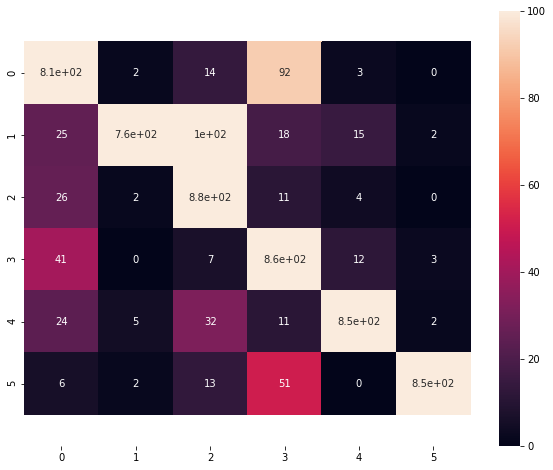

In [47]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

Y_val_pred = model.predict(test_images1)#, num_of_test_samples // batch_size+1
Y_val_pred = np.argmax(Y_val_pred, axis=1)

test_labels = np.argmax(test_labels1, axis = 1)

cf_matrix = confusion_matrix(test_labels, Y_val_pred)
print("Accuracy Score is displayed below:")

print(accuracy_score(test_labels, Y_val_pred))
categories = list(np.unique(test_labels))
df_cm = pd.DataFrame(cf_matrix,index = categories,
  columns = categories)
plt.figure(figsize=(10,8))
res = sns.heatmap(df_cm, annot=True, vmin=0.0, vmax=100.0)
bottom, top = res.get_ylim()
res.set_ylim(bottom + 0.5, top - 0.5)
cf_matrix

Text(0.5, 1.0, 'Loss Curves')

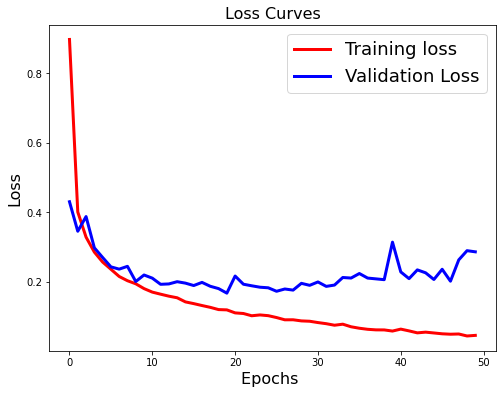

In [48]:
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

Text(0.5, 1.0, 'Accuracy Curves')

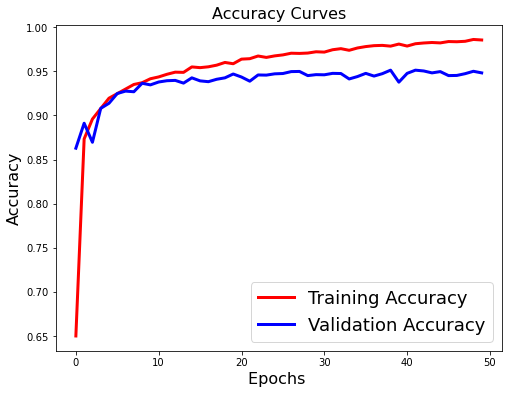

In [49]:
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

## Finding what Depth works the best in our scenario

In [ ]:
nets = 8
model = [0]*8

In [ ]:
model[0] = Sequential()
model[0] = VGG16(weights = "C:/Users/shank/.keras/models/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5",
              include_top=False, input_shape=(80, 80, 3))
flat1 = Flatten()(model[0].layers[-1].output)
x2 = Dropout(0.3)(flat1)
class1 = Dense(1024, activation='relu', kernel_initializer= kaiming)(x2)
x2 = Dropout(0.3)(class1)
output = Dense(6, activation='softmax')(class1)
model[0] = Model(inputs=model[0].inputs, outputs=output)
model[0].compile(optimizer=keras.optimizers.Adamax(lr=0.001), 
              loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model[1] = Sequential()
model[1] = VGG16(weights = "C:/Users/shank/.keras/models/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5",
              include_top=False, input_shape=(80, 80, 3))
flat1 = Flatten()(model[1].layers[-1].output)
x2 = Dropout(0.3)(flat1)
class1 = Dense(2048, activation='relu', kernel_initializer= kaiming)(x2)
x2 = Dropout(0.3)(class1)
output = Dense(6, activation='softmax')(class1)
model[1] = Model(inputs=model[1].inputs, outputs=output)
model[1].compile(optimizer=keras.optimizers.Adamax(lr=0.001), 
              loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model[2] = Sequential()
model[2] = VGG16(weights = "C:/Users/shank/.keras/models/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5",
              include_top=False, input_shape=(80, 80, 3))
flat1 = Flatten()(model[2].layers[-1].output)
x2 = Dropout(0.3)(flat1)
class1 = Dense(0, activation='relu', kernel_initializer= kaiming)(x2)
x2 = Dropout(0.3)(class1)
output = Dense(6, activation='softmax')(class1)
model[2] = Model(inputs=model[2].inputs, outputs=output)
model[2].compile(optimizer=keras.optimizers.Adamax(lr=0.001), 
              loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model[3] = Sequential()
model[3] = VGG16(weights = "C:/Users/shank/.keras/models/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5",
              include_top=False, input_shape=(80, 80, 3))
flat1 = Flatten()(model[3].layers[-1].output)
x2 = Dropout(0.3)(flat1)
class1 = Dense(32, activation='relu', kernel_initializer= kaiming)(x2)
x2 = Dropout(0.3)(class1)
output = Dense(6, activation='softmax')(class1)
model[3] = Model(inputs=model[3].inputs, outputs=output)
model[3].compile(optimizer=keras.optimizers.Adamax(lr=0.001), 
              loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model[4] = Sequential()
model[4] = VGG16(weights = "C:/Users/shank/.keras/models/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5",
              include_top=False, input_shape=(80, 80, 3))
flat1 = Flatten()(model[4].layers[-1].output)
x2 = Dropout(0.3)(flat1)
class1 = Dense(64, activation='relu', kernel_initializer= kaiming)(x2)
x2 = Dropout(0.3)(class1)
output = Dense(6, activation='softmax')(class1)
model[4] = Model(inputs=model[4].inputs, outputs=output)
model[4].compile(optimizer=keras.optimizers.Adamax(lr=0.001), 
              loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model[5] = Sequential()
model[5] = VGG16(weights = "C:/Users/shank/.keras/models/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5",
              include_top=False, input_shape=(80, 80, 3))
flat1 = Flatten()(model[5].layers[-1].output)
x2 = Dropout(0.3)(flat1)
class1 = Dense(128, activation='relu', kernel_initializer= kaiming)(x2)
x2 = Dropout(0.3)(class1)
output = Dense(6, activation='softmax')(class1)
model[5] = Model(inputs=model[5].inputs, outputs=output)
model[5].compile(optimizer=keras.optimizers.Adamax(lr=0.001), 
              loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model[6] = Sequential()
model[6] = VGG16(weights = "C:/Users/shank/.keras/models/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5",
              include_top=False, input_shape=(80, 80, 3))
flat1 = Flatten()(model[6].layers[-1].output)
x2 = Dropout(0.3)(flat1)
class1 = Dense(256, activation='relu', kernel_initializer= kaiming)(x2)
x2 = Dropout(0.3)(class1)
output = Dense(6, activation='softmax')(class1)
model[6] = Model(inputs=model[6].inputs, outputs=output)
model[6].compile(optimizer=keras.optimizers.Adamax(lr=0.001), 
              loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model[7] = Sequential()
model[7] = VGG16(weights = "C:/Users/shank/.keras/models/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5",
              include_top=False, input_shape=(80, 80, 3))
flat1 = Flatten()(model[7].layers[-1].output)
x2 = Dropout(0.3)(flat1)
class1 = Dense(512, activation='relu', kernel_initializer= kaiming)(x2)
x2 = Dropout(0.3)(class1)
output = Dense(6, activation='softmax')(class1)
model[7] = Model(inputs=model[7].inputs, outputs=output)
model[7].compile(optimizer=keras.optimizers.Adamax(lr=0.001), 
              loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping()
history = [0] * nets
names = ["1024","2048","0","32","64","128","256","512"]
for i in range(nets):
    history[i] = model[i].fit(train_generator, validation_data=valid_generator, epochs=7, 
              steps_per_epoch=train_generator.n//train_generator.batch_size,
             validation_steps=valid_generator.n//valid_generator.batch_size)

In [ ]:
# PLOT ACCURACIES
plt.figure(figsize=(15,5))
styles = ['--']
for i in range(nets):
    plt.plot(history[i].history['val_accuracy'],linestyle=styles[0])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(names, loc='upper left')
axes = plt.gca()
axes.set_ylim([0.90,1])
plt.show()

In [ ]:
#saving the weights

In [50]:
model.save_weights("model1.hdf5")

In [ ]:
#WE will do the same process and search for the best weight
#We will see nowabs how ensembling or soft voting is carried out.
#Here we create models and with slightly different hyperparameters to maximize our ensembling accuracy

In [ ]:
model = [0]


model = Sequential()
model = VGG16(weights = "C:/Users/shank/.keras/models/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5",include_top=False, input_shape=(80, 80, 3))
flat1 = Flatten()(model1.layers[-1].output)
x2 = Dropout(0.3)(flat1)
class1 = Dense(256, activation='relu', kernel_initializer= kaiming)(x2)
# replacing the value here for every config
# 1 layer-val accuracy is 0.1668
# 32 layer - val accuracy is 0.9001
#
#class1 = Dense(2**(i + 4), activation='relu')(x2)
x2 = Dropout(0.3)(class1)
output = Dense(6, activation='softmax')(class1)
model = Model(inputs=model.inputs, outputs=output)
model.compile(optimizer=keras.optimizers.Adamax(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [53]:

model1 = [0]


model1 = Sequential()
model1 = VGG16(weights = "C:/Users/shank/.keras/models/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5",include_top=False, input_shape=(80, 80, 3))
flat1 = Flatten()(model1.layers[-1].output)
x2 = Dropout(0.3)(flat1)
class1 = Dense(256, activation='relu', kernel_initializer= kaiming)(x2)
# replacing the value here for every config
# 1 layer-val accuracy is 0.1668
# 32 layer - val accuracy is 0.9001
#
#class1 = Dense(2**(i + 4), activation='relu')(x2)
x2 = Dropout(0.3)(class1)
output = Dense(6, activation='softmax')(class1)
model1 = Model(inputs=model1.inputs, outputs=output)
model1.compile(optimizer=keras.optimizers.Adamax(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [54]:

model2 = [0]


model2 = Sequential()
model2 = VGG16(weights = "C:/Users/shank/.keras/models/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5",include_top=False, input_shape=(80, 80, 3))
flat1 = Flatten()(model2.layers[-1].output)
x2 = Dropout(0.3)(flat1)
class1 = Dense(1024, activation='relu', kernel_initializer= kaiming)(x2)
# replacing the value here for every config
# 1 layer-val accuracy is 0.1668
# 32 layer - val accuracy is 0.9001
#
#class1 = Dense(2**(i + 4), activation='relu')(x2)
x2 = Dropout(0.3)(class1)
output = Dense(6, activation='softmax')(class1)
model2 = Model(inputs=model2.inputs, outputs=output)
model2.compile(optimizer=keras.optimizers.Adamax(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [55]:

model3 = [0]


model3 = Sequential()
model3 = VGG16(weights = "C:/Users/shank/.keras/models/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5",include_top=False, input_shape=(80, 80, 3))
flat1 = Flatten()(model3.layers[-1].output)
x2 = Dropout(0.3)(flat1)
class1 = Dense(256, activation='relu', kernel_initializer= kaiming)(x2)
# replacing the value here for every config
# 1 layer-val accuracy is 0.1668
# 32 layer - val accuracy is 0.9001
#
#class1 = Dense(2**(i + 4), activation='relu')(x2)
x2 = Dropout(0.3)(class1)
output = Dense(6, activation='softmax')(class1)
model3 = Model(inputs=model3.inputs, outputs=output)
model3.compile(optimizer=keras.optimizers.Adamax(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [56]:

model4 = [0]


model4 = Sequential()
model4 = VGG16(weights = "C:/Users/shank/.keras/models/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5",include_top=False, input_shape=(80, 80, 3))
flat1 = Flatten()(model4.layers[-1].output)
x2 = Dropout(0.3)(flat1)
class1 = Dense(256, activation='relu', kernel_initializer= kaiming)(x2)
# replacing the value here for every config
# 1 layer-val accuracy is 0.1668
# 32 layer - val accuracy is 0.9001
#
#class1 = Dense(2**(i + 4), activation='relu')(x2)
x2 = Dropout(0.3)(class1)
output = Dense(6, activation='softmax')(class1)
model4 = Model(inputs=model4.inputs, outputs=output)
model4.compile(optimizer=keras.optimizers.Adamax(lr=0.000001), loss='categorical_crossentropy', metrics=['accuracy'])

In [57]:

model5 = [0]


model5 = Sequential()
model5 = VGG16(weights = "C:/Users/shank/.keras/models/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5",include_top=False, input_shape=(80, 80, 3))
flat1 = Flatten()(model5.layers[-1].output)
x2 = Dropout(0.3)(flat1)
class1 = Dense(2048, activation='relu', kernel_initializer= kaiming)(x2)
# replacing the value here for every config
# 1 layer-val accuracy is 0.1668
# 32 layer - val accuracy is 0.9001
#
#class1 = Dense(2**(i + 4), activation='relu')(x2)
x2 = Dropout(0.3)(class1)
output = Dense(6, activation='softmax')(class1)
model5 = Model(inputs=model5.inputs, outputs=output)
model5.compile(optimizer=keras.optimizers.Adamax(lr=0.000025), loss='categorical_crossentropy', metrics=['accuracy'])

In [58]:

model6 = [0]


model6 = Sequential()
model6 = VGG16(weights = "C:/Users/shank/.keras/models/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5",include_top=False, input_shape=(80, 80, 3))
flat1 = Flatten()(model6.layers[-1].output)
x2 = Dropout(0.3)(flat1)
class1 = Dense(256, activation='relu', kernel_initializer= kaiming)(x2)
# replacing the value here for every config
# 1 layer-val accuracy is 0.1668
# 32 layer - val accuracy is 0.9001
#
#class1 = Dense(2**(i + 4), activation='relu')(x2)
x2 = Dropout(0.3)(class1)
output = Dense(6, activation='softmax')(class1)
model6 = Model(inputs=model6.inputs, outputs=output)
model6.compile(optimizer=keras.optimizers.Adamax(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [73]:

model7 = [0]


model7 = Sequential()
model7 = VGG16(weights = "C:/Users/shank/.keras/models/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5",include_top=False, input_shape=(80, 80, 3))
flat1 = Flatten()(model7.layers[-1].output)
x2 = Dropout(0.3)(flat1)
class1 = Dense(256, activation='relu', kernel_initializer= kaiming)(x2)
# replacing the value here for every config
# 1 layer-val accuracy is 0.1668
# 32 layer - val accuracy is 0.9001
#
class1 = Dense(2**10, activation='relu')(x2)
x2 = Dropout(0.3)(class1)
output = Dense(6, activation='softmax')(class1)
model7 = Model(inputs=model7.inputs, outputs=output)
model7.compile(optimizer=keras.optimizers.Adamax(lr=0.00001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:

model7 = [0]


model7 = Sequential()
model7 = VGG16(weights = "C:/Users/shank/.keras/models/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5",include_top=False, input_shape=(80, 80, 3))
flat1 = Flatten()(model7.layers[-1].output)
x2 = Dropout(0.3)(flat1)
class1 = Dense(256, activation='relu', kernel_initializer= kaiming)(x2)
# replacing the value here for every config
# 1 layer-val accuracy is 0.1668
# 32 layer - val accuracy is 0.9001
#
class1 = Dense(256, activation='relu')(x2)
x2 = Dropout(0.3)(class1)
output = Dense(6, activation='softmax')(class1)
model7 = Model(inputs=model7.inputs, outputs=output)
model7.compile(optimizer=keras.optimizers.Adamax(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping()
history = model.fit(train_generator, validation_data=valid_generator, epochs=30, 
              steps_per_epoch=train_generator.n//train_generator.batch_size,
             validation_steps=valid_generator.n//valid_generator.batch_size)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

Y_val_pred = model1.predict(test_images1)#, num_of_test_samples // batch_size+1
Y_val_pred = np.argmax(Y_val_pred, axis=1)

test_labels = np.argmax(test_labels1, axis = 1)

cf_matrix = confusion_matrix(test_labels, Y_val_pred)
print("Accuracy Score is displayed below:")

print(accuracy_score(test_labels, Y_val_pred))
categories = list(np.unique(test_labels))
df_cm = pd.DataFrame(cf_matrix,index = categories,
  columns = categories)
plt.figure(figsize=(10,8))
res = sns.heatmap(df_cm, annot=True, vmin=0.0, vmax=100.0)
bottom, top = res.get_ylim()
res.set_ylim(bottom + 0.5, top - 0.5)
cf_matrix

In [ ]:
plt.figure(figsize=[8,6])
plt.plot(history1.history['loss'],'r',linewidth=3.0)
plt.plot(history1.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

In [ ]:
plt.figure(figsize=[8,6])
plt.plot(history1.history['accuracy'],'r',linewidth=3.0)
plt.plot(history1.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping()
history1 = model1.fit(train_generator, validation_data=valid_generator, epochs=20, 
              steps_per_epoch=train_generator.n//train_generator.batch_size,
             validation_steps=valid_generator.n//valid_generator.batch_size)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

Y_val_pred = model1.predict(test_images1)#, num_of_test_samples // batch_size+1
Y_val_pred = np.argmax(Y_val_pred, axis=1)

test_labels = np.argmax(test_labels1, axis = 1)

cf_matrix = confusion_matrix(test_labels, Y_val_pred)
print("Accuracy Score is displayed below:")

print(accuracy_score(test_labels, Y_val_pred))
categories = list(np.unique(test_labels))
df_cm = pd.DataFrame(cf_matrix,index = categories,
  columns = categories)
plt.figure(figsize=(10,8))
res = sns.heatmap(df_cm, annot=True, vmin=0.0, vmax=100.0)
bottom, top = res.get_ylim()
res.set_ylim(bottom + 0.5, top - 0.5)
cf_matrix

In [ ]:
plt.figure(figsize=[8,6])
plt.plot(history1.history['loss'],'r',linewidth=3.0)
plt.plot(history1.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

In [ ]:
plt.figure(figsize=[8,6])
plt.plot(history1.history['accuracy'],'r',linewidth=3.0)
plt.plot(history1.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [ ]:
model1.save_weights("80x80badClass4andsuperbadClass3.hdf5")

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping()
history2 = model2.fit(train_generator, validation_data=valid_generator, epochs=25, 
              steps_per_epoch=train_generator.n//train_generator.batch_size,
             validation_steps=valid_generator.n//valid_generator.batch_size)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

Y_val_pred = model2.predict(test_images1)#, num_of_test_samples // batch_size+1
Y_val_pred = np.argmax(Y_val_pred, axis=1)

test_labels = np.argmax(test_labels1, axis = 1)

cf_matrix = confusion_matrix(test_labels, Y_val_pred)
print("Accuracy Score is displayed below:")

print(accuracy_score(test_labels, Y_val_pred))
categories = list(np.unique(test_labels))
df_cm = pd.DataFrame(cf_matrix,index = categories,
  columns = categories)
plt.figure(figsize=(10,8))
res = sns.heatmap(df_cm, annot=True, vmin=0.0, vmax=100.0)
bottom, top = res.get_ylim()
res.set_ylim(bottom + 0.5, top - 0.5)
cf_matrix

In [ ]:
plt.figure(figsize=[8,6])
plt.plot(history2.history['loss'],'r',linewidth=3.0)
plt.plot(history2.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

In [ ]:
plt.figure(figsize=[8,6])
plt.plot(history2.history['accuracy'],'r',linewidth=3.0)
plt.plot(history2.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping()
history3 = model3.fit(train_generator, validation_data=valid_generator, epochs=25, 
              steps_per_epoch=train_generator.n//train_generator.batch_size,
             validation_steps=valid_generator.n//valid_generator.batch_size)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

Y_val_pred = model3.predict(test_images1)#, num_of_test_samples // batch_size+1
Y_val_pred = np.argmax(Y_val_pred, axis=1)

test_labels = np.argmax(test_labels1, axis = 1)

cf_matrix = confusion_matrix(test_labels, Y_val_pred)
print("Accuracy Score is displayed below:")

print(accuracy_score(test_labels, Y_val_pred))
categories = list(np.unique(test_labels))
df_cm = pd.DataFrame(cf_matrix,index = categories,
  columns = categories)
plt.figure(figsize=(10,8))
res = sns.heatmap(df_cm, annot=True, vmin=0.0, vmax=100.0)
bottom, top = res.get_ylim()
res.set_ylim(bottom + 0.5, top - 0.5)
cf_matrix

In [ ]:
plt.figure(figsize=[8,6])
plt.plot(history3.history['loss'],'r',linewidth=3.0)
plt.plot(history3.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

In [ ]:
plt.figure(figsize=[8,6])
plt.plot(history3.history['accuracy'],'r',linewidth=3.0)
plt.plot(history3.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [ ]:
model3.save_weights("model380x80okayClass2andbadClass2x1.hdf5")

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping()
history4 = model4.fit(train_generator, validation_data=valid_generator, epochs=25, 
              steps_per_epoch=train_generator.n//train_generator.batch_size,
             validation_steps=valid_generator.n//valid_generator.batch_size)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

Y_val_pred = model4.predict(test_images1)#, num_of_test_samples // batch_size+1
Y_val_pred = np.argmax(Y_val_pred, axis=1)

test_labels = np.argmax(test_labels1, axis = 1)

cf_matrix = confusion_matrix(test_labels, Y_val_pred)
print("Accuracy Score is displayed below:")

print(accuracy_score(test_labels, Y_val_pred))
categories = list(np.unique(test_labels))
df_cm = pd.DataFrame(cf_matrix,index = categories,
  columns = categories)
plt.figure(figsize=(10,8))
res = sns.heatmap(df_cm, annot=True, vmin=0.0, vmax=100.0)
bottom, top = res.get_ylim()
res.set_ylim(bottom + 0.5, top - 0.5)
cf_matrix

In [ ]:
plt.figure(figsize=[8,6])
plt.plot(history4.history['loss'],'r',linewidth=3.0)
plt.plot(history4.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

In [ ]:
plt.figure(figsize=[8,6])
plt.plot(history4.history['accuracy'],'r',linewidth=3.0)
plt.plot(history4.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping()
history5 = model5.fit(train_generator, validation_data=valid_generator, epochs=100, 
              steps_per_epoch=train_generator.n//train_generator.batch_size,
             validation_steps=valid_generator.n//valid_generator.batch_size)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

Y_val_pred = model5.predict(test_images1)#, num_of_test_samples // batch_size+1
Y_val_pred = np.argmax(Y_val_pred, axis=1)

test_labels = np.argmax(test_labels1, axis = 1)

cf_matrix = confusion_matrix(test_labels, Y_val_pred)
print("Accuracy Score is displayed below:")

print(accuracy_score(test_labels, Y_val_pred))
categories = list(np.unique(test_labels))
df_cm = pd.DataFrame(cf_matrix,index = categories,
  columns = categories)
plt.figure(figsize=(10,8))
res = sns.heatmap(df_cm, annot=True, vmin=0.0, vmax=100.0)
bottom, top = res.get_ylim()
res.set_ylim(bottom + 0.5, top - 0.5)
cf_matrix

In [ ]:
plt.figure(figsize=[8,6])
plt.plot(history5.history['loss'],'r',linewidth=3.0)
plt.plot(history5.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

In [ ]:
plt.figure(figsize=[8,6])
plt.plot(history5.history['accuracy'],'r',linewidth=3.0)
plt.plot(history5.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [ ]:
model5.save_weights("model5.hdf5")

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping()
history6 = model6.fit(train_generator, validation_data=valid_generator, epochs=50, 
              steps_per_epoch=train_generator.n//train_generator.batch_size,
             validation_steps=valid_generator.n//valid_generator.batch_size)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

Y_val_pred = model6.predict(test_images1)#, num_of_test_samples // batch_size+1
Y_val_pred = np.argmax(Y_val_pred, axis=1)

test_labels = np.argmax(test_labels1, axis = 1)

cf_matrix = confusion_matrix(test_labels, Y_val_pred)
print("Accuracy Score is displayed below:")

print(accuracy_score(test_labels, Y_val_pred))
categories = list(np.unique(test_labels))
df_cm = pd.DataFrame(cf_matrix,index = categories,
  columns = categories)
plt.figure(figsize=(10,8))
res = sns.heatmap(df_cm, annot=True, vmin=0.0, vmax=100.0)
bottom, top = res.get_ylim()
res.set_ylim(bottom + 0.5, top - 0.5)
cf_matrix

In [ ]:
plt.figure(figsize=[8,6])
plt.plot(history6.history['loss'],'r',linewidth=3.0)
plt.plot(history6.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

In [ ]:
plt.figure(figsize=[8,6])
plt.plot(history6.history['accuracy'],'r',linewidth=3.0)
plt.plot(history6.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [ ]:
model6.save_weights("model6.hdf5")

In [74]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping()
history7 = model7.fit(train_generator, validation_data=valid_generator, epochs=20, 
              steps_per_epoch=train_generator.n//train_generator.batch_size,
             validation_steps=valid_generator.n//valid_generator.batch_size)

Epoch 1/20
690/690 [==============================] - 53s 76ms/step - loss: 0.8527 - accuracy: 0.6885 - val_loss: 0.3041 - val_accuracy: 0.9038: 24s - los - ETA: 22s - lo - ETA: 20s - loss: 1.0746 - accura - ETA: 19s - loss: 1.0645 - accu - ETA: 19s - loss: 1.0527 - accuracy: 0.604 - ETA: 19s - loss: 1.0518 - accuracy: 0.60 - ETA: 18s - loss: 1.0499 - accur - ETA: 18s - loss: 1.0396 - accuracy: 0. - ETA: 18s - loss: 1.0360 - ETA: 16s - loss: 1.0192 - accuracy: 0.619 - ETA: 16s - loss: 1.0183 - - ETA: 15s - loss: 1.0041 - accuracy: 0.625 - ETA:  - ETA: 0s - loss: 0.8563 - 
Epoch 2/20
690/690 [==============================] - 54s 78ms/step - loss: 0.3173 - accuracy: 0.8963 - val_loss: 0.2583 - val_accuracy: 0.91270s - loss: 0.3
Epoch 3/20
690/690 [==============================] - 53s 77ms/step - loss: 0.2639 - accuracy: 0.9156 - val_loss: 0.2375 - val_accuracy: 0.921734s - loss: 0.2 - ETA: 23s -  - ETA: 21s -  - E - ETA: 0s - loss: 0.2639 - ac
Epoch 4/20
690/690 [======================

Accuracy Score is displayed below:
0.9380434782608695


array([[877,   2,  10,  28,   2,   1],
       [ 22, 786,  39,  51,  19,   3],
       [ 20,   9, 872,  14,   4,   1],
       [ 33,   1,   8, 870,   5,   3],
       [ 17,   3,   8,  14, 877,   1],
       [  4,   1,   1,  16,   2, 896]], dtype=int64)

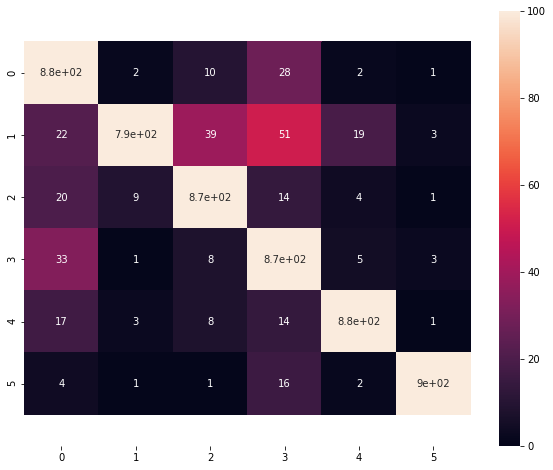

In [76]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

Y_val_pred = model7.predict(test_images1)#, num_of_test_samples // batch_size+1

Y_val_pred = np.argmax(Y_val_pred, axis=1)

test_labels = np.argmax(test_labels1, axis = 1)

cf_matrix = confusion_matrix(test_labels, Y_val_pred)
print("Accuracy Score is displayed below:")

print(accuracy_score(test_labels, Y_val_pred))
categories = list(np.unique(test_labels))
df_cm = pd.DataFrame(cf_matrix,index = categories,
  columns = categories)
plt.figure(figsize=(10,8))
res = sns.heatmap(df_cm, annot=True, vmin=0.0, vmax=100.0)
bottom, top = res.get_ylim()
res.set_ylim(bottom + 0.5, top - 0.5)
cf_matrix

Text(0.5, 1.0, 'Loss Curves')

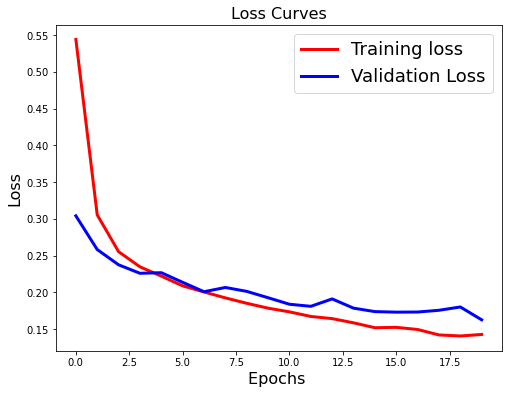

In [77]:
plt.figure(figsize=[8,6])
plt.plot(history7.history['loss'],'r',linewidth=3.0)
plt.plot(history7.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

Text(0.5, 1.0, 'Accuracy Curves')

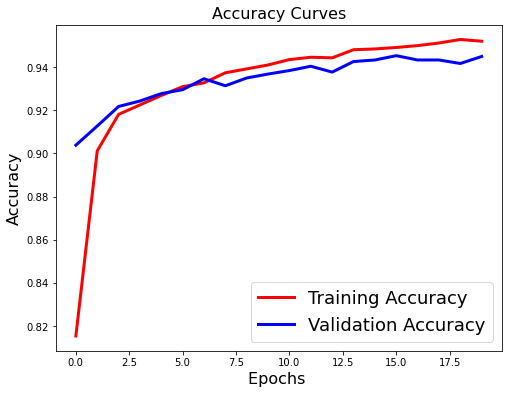

In [78]:
plt.figure(figsize=[8,6])
plt.plot(history7.history['accuracy'],'r',linewidth=3.0)
plt.plot(history7.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [144]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

#using ensembling technique here
results1 = np.zeros( (test_images1.shape[0],6) ) 
results1 = results1 + model.predict(test_images1)
results1 = results1 + model1.predict(test_images1)
results1 = results1 + model2.predict(test_images1)
results1 = results1 + model3.predict(test_images1)
results1 = results1 + model5.predict(test_images1)
results1 = results1 + model6.predict(test_images1)
results1 = results1 + model7.predict(test_images1)

results1 = np.argmax(results1, axis=1)

test_labels = np.argmax(test_labels1, axis = 1)

cf_matrix = confusion_matrix(test_labels, results1)
print("Accuracy Score is displayed below:")

print(accuracy_score(test_labels, results1))
categories = list(np.unique(test_labels))
df_cm = pd.DataFrame(cf_matrix,index = categories,
  columns = categories)
plt.figure(figsize=(10,8))
res = sns.heatmap(df_cm, annot=True, vmin=0.0, vmax=100.0)
bottom, top = res.get_ylim()
res.set_ylim(bottom + 0.5, top - 0.5)
cf_matrix

ValueError: in user code:

    C:\Users\shank\anaconda3\envs\myenv\lib\site-packages\tensorflow\python\keras\engine\training.py:1478 predict_function  *
        return step_function(self, iterator)
    C:\Users\shank\anaconda3\envs\myenv\lib\site-packages\tensorflow\python\keras\engine\training.py:1468 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\shank\anaconda3\envs\myenv\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\shank\anaconda3\envs\myenv\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\shank\anaconda3\envs\myenv\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\shank\anaconda3\envs\myenv\lib\site-packages\tensorflow\python\keras\engine\training.py:1461 run_step  **
        outputs = model.predict_step(data)
    C:\Users\shank\anaconda3\envs\myenv\lib\site-packages\tensorflow\python\keras\engine\training.py:1434 predict_step
        return self(x, training=False)
    C:\Users\shank\anaconda3\envs\myenv\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\Users\shank\anaconda3\envs\myenv\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:259 assert_input_compatibility
        ' but received input with shape ' + display_shape(x.shape))

    ValueError: Input 0 of layer sequential_12 is incompatible with the layer: expected axis -1 of input shape to have value 1 but received input with shape (None, 80, 80, 3)
